In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv("titanic/train.csv")
data_test = pd.read_csv("titanic/test.csv")
data_gs = pd.read_csv("titanic/gender_submission.csv")

In [13]:
data_train.groupby("Pclass").sum()/data_train.groupby("Pclass").count()

<ipython-input-13-001185efb3fc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_train.groupby("Pclass").sum()/data_train.groupby("Pclass").count()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket
Pclass,,,,,,,,,,,
1,38.233441,NaN,NaN,84.154687,NaN,0.356481,461.597222,NaN,0.416667,0.629630,NaN
2,29.877630,NaN,NaN,20.662183,NaN,0.380435,445.956522,NaN,0.402174,0.472826,NaN
3,25.140620,NaN,NaN,13.675550,NaN,0.393075,439.154786,NaN,0.615071,0.242363,NaN


In [14]:
data_train.groupby("Pclass").mean()

<ipython-input-14-c6c86dd9253a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_train.groupby("Pclass").mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
data_train.shape

(891, 12)

In [16]:
data_train.groupby("Pclass").count()["Survived"]

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [24]:
y_pred = (data_train["Pclass"] == 1).astype(int)

In [25]:
def accuracy(y_pred, y):
    return (y_pred == y).astype(int).sum()/len(y)

In [26]:
accuracy(y_pred, data_train["Survived"])

0.6790123456790124

In [28]:
data_train.groupby("Age").sum()["Survived"]/data_train.groupby("Age").count()["Survived"]

<ipython-input-28-6d8036bc6d90>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_train.groupby("Age").sum()["Survived"]/data_train.groupby("Age").count()["Survived"]


Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

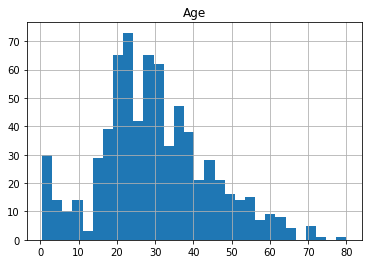

In [31]:
data_train.hist("Age", bins=30)

In [34]:
!pip install plotly

In [37]:
import plotly.express as px


fig = px.histogram(data_train, x="Age", color="Survived")
fig.show()

In [36]:
import plotly.express as px


fig = px.histogram(data_train, x="Age", color="Pclass")
fig.show()

In [39]:
data_train[data_train["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [40]:
import plotly.express as px


fig = px.histogram(data_train[data_train["Survived"] == 1], x="Age", color="Pclass")
fig.show()

In [42]:
fig = px.histogram(data_train[data_train["Survived"] == 0], x="Age", color="Pclass")
fig.show()

In [45]:
data_train["Age_round"] = (data_train["Age"]/10).round()*10

In [46]:
data_train.groupby("Age_round").sum()["Survived"]/data_train.groupby("Age_round").count()["Survived"]

<ipython-input-46-7146caf43523>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Age_round
0.0     0.704545
10.0    0.411765
20.0    0.354260
30.0    0.404494
40.0    0.424242
50.0    0.409836
60.0    0.352941
70.0    0.000000
80.0    1.000000
Name: Survived, dtype: float64

In [47]:
data_train.groupby(["Pclass","Age_round"]).sum()["Survived"]/data_train.groupby(["Pclass","Age_round"]).count()["Survived"]

<ipython-input-47-db5e211fb7d8>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Pclass  Age_round
1       0.0          0.666667
        10.0         1.000000
        20.0         0.783784
        30.0         0.709677
        40.0         0.725490
        50.0         0.571429
        60.0         0.391304
        70.0         0.000000
        80.0         1.000000
2       0.0          1.000000
        10.0         1.000000
        20.0         0.413043
        30.0         0.454545
        40.0         0.433333
        50.0         0.333333
        60.0         0.333333
        70.0         0.000000
3       0.0          0.571429
        10.0         0.230769
        20.0         0.221429
        30.0         0.271739
        40.0         0.117647
        50.0         0.000000
        60.0         0.200000
        70.0         0.000000
Name: Survived, dtype: float64

In [ ]:
>>> from sklearn.datasets import load_iris
>>> from sklearn.model_selection import cross_val_score
>>> from sklearn.tree import DecisionTreeClassifier
>>> clf = DecisionTreeClassifier(random_state=0)
>>> iris = load_iris()
>>> cross_val_score(clf, iris.data, iris.target, cv=10)
...                             
...
array([ 1.     ,  0.93...,  0.86...,  0.93...,  0.93...,
        0.93...,  0.93...,  1.     ,  0.93...,  1.      ])

In [57]:
data_train["Age_round"] = data_train["Age_round"].fillna(data_train["Age_round"].mean())

In [58]:
data_train[["Survived", "Pclass", "Age_round"]].describe()

,Survived,Pclass,Age_round
count,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.523810
std,0.486592,0.836071,13.291803
min,0.000000,1.000000,0.000000
25%,0.000000,2.000000,20.000000
50%,0.000000,3.000000,29.523810
75%,1.000000,3.000000,40.000000
max,1.000000,3.000000,80.000000


In [61]:
data_train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [62]:
data_train["Age_round"].unique()

array([20.        , 40.        , 30.        , 29.52380952, 50.        ,
        0.        , 10.        , 60.        , 70.        , 80.        ])

In [60]:
data_train[["Survived", "Pclass", "Age_round"]]

,Survived,Pclass,Age_round
0,0,3,20.00000
1,1,1,40.00000
2,1,3,30.00000
3,1,1,40.00000
4,0,3,40.00000
...,...,...,...
886,0,2,30.00000
887,1,1,20.00000
888,0,3,29.52381
889,1,1,30.00000


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
X = data_train[['Pclass',  'Age', 'SibSp','Parch',  'Fare', ]]
y = data_train["Survived"]

In [78]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(random_state=0)

In [79]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_round'],
      dtype='object')

In [76]:
for col in ['Pclass',  'Age', 'SibSp','Parch',  'Fare', ]:
    data_train[col] = data_train[col].fillna(data_train[col].mean())

In [74]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age_round      float64
dtype: object

In [65]:
from sklearn import tree

In [80]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 2.50
|   |--- feature_4 <= 13.65
|   |   |--- feature_4 <= 7.75
|   |   |   |--- class: 0
|   |   |--- feature_4 >  7.75
|   |   |   |--- feature_1 <= 50.50
|   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |--- feature_4 <= 11.00
|   |   |   |   |   |   |   |--- feature_1 <= 26.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 22.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 16.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  16.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 18.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  18.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_1 >  22.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 

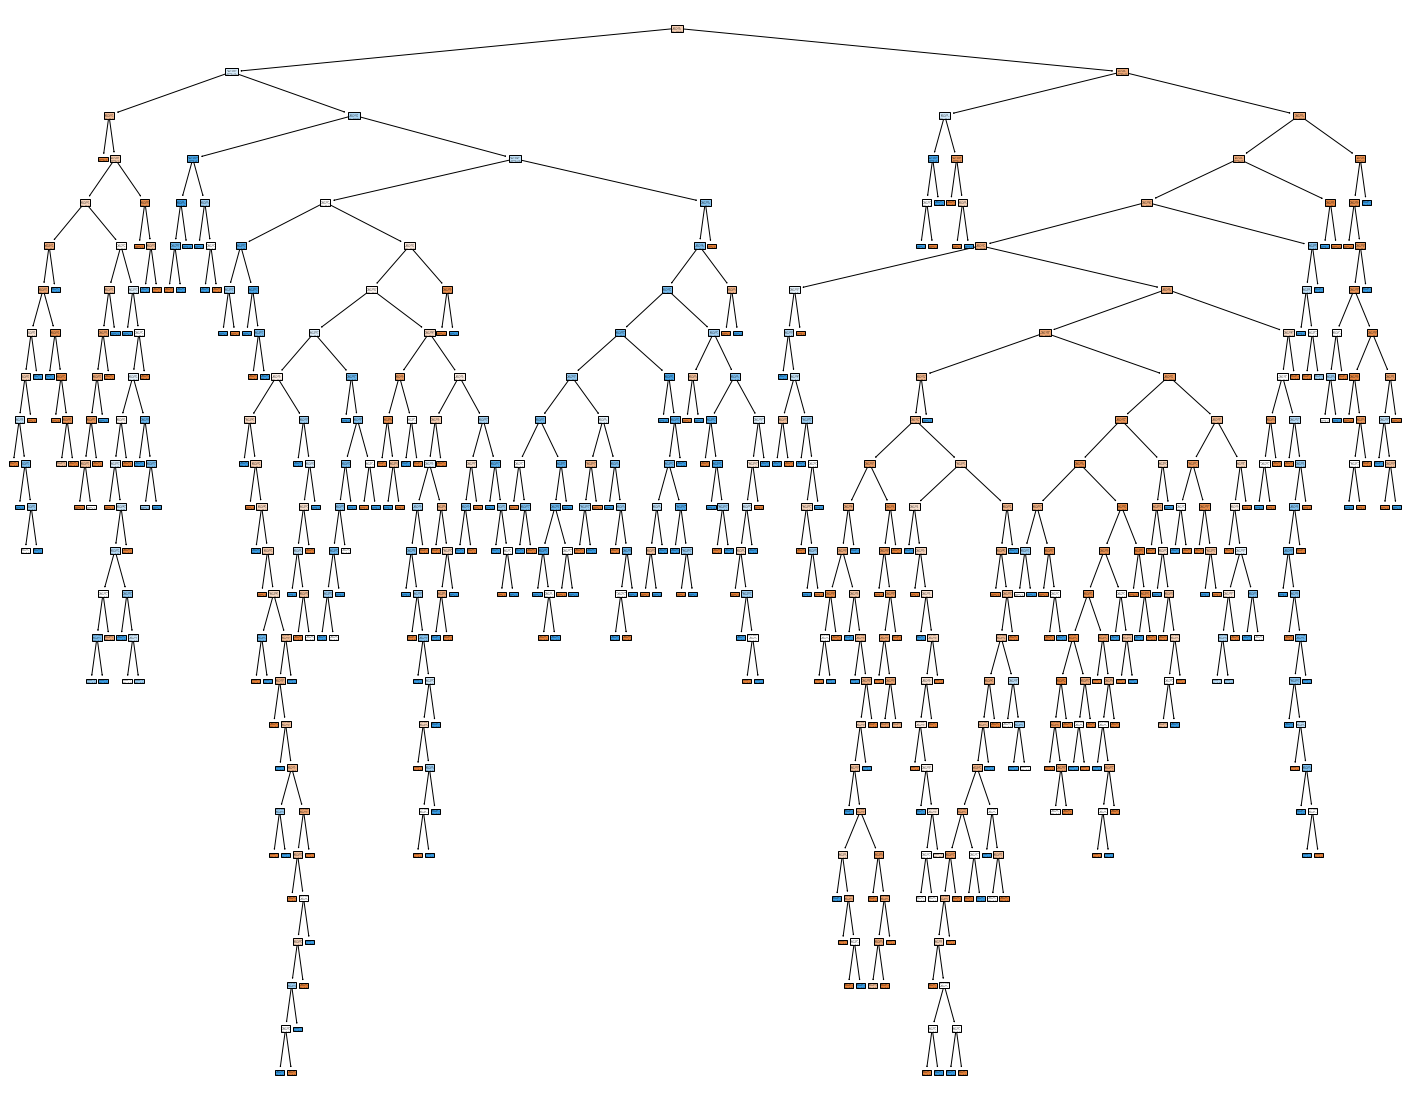

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 

                   filled=True)

In [91]:
bin(158-2**2 - 2**3+2**6), 158-2**2 - 2**3+2**6

('0b11010010', 210)

In [92]:
bin(125-2**5), 125-2**5

('0b1011101', 93)

In [ ]:
11010010
01011101
100101111

In [90]:
int("00101111", 2)

47

In [97]:
bin(11)

'0b1011'

In [98]:
bin(180)

'0b10110100'

In [ ]:
00001011

10110100

01001100
00001011

01010111

10101001


In [99]:
int("10101001", 2)

169

In [105]:
1/2 + 1/8

0.625

In [106]:
1/8

0.125

In [107]:
bin(81)

'0b1010001'

In [108]:
bin(33)

'0b100001'

In [109]:
81.625 + 33.125

114.75

In [110]:
1/2 + 1/4

0.75

In [111]:
bin(114)

'0b1110010'

In [ ]:
1010001101
0100001001
1110010110

In [114]:
int("1110010", 2)

114

In [115]:
int("150", 8)

104

In [119]:

hex(530)

'0x212'

In [121]:
bin(551)

'0b1000100111'

In [134]:
for n in range(1000):
    p = n
    while n != 0:
        print(2*(n%5 + 3), end="")
        n//=10
    print("----", p, "---------")

---- 0 ---------
8---- 1 ---------
10---- 2 ---------
12---- 3 ---------
14---- 4 ---------
6---- 5 ---------
8---- 6 ---------
10---- 7 ---------
12---- 8 ---------
14---- 9 ---------
68---- 10 ---------
88---- 11 ---------
108---- 12 ---------
128---- 13 ---------
148---- 14 ---------
68---- 15 ---------
88---- 16 ---------
108---- 17 ---------
128---- 18 ---------
148---- 19 ---------
610---- 20 ---------
810---- 21 ---------
1010---- 22 ---------
1210---- 23 ---------
1410---- 24 ---------
610---- 25 ---------
810---- 26 ---------
1010---- 27 ---------
1210---- 28 ---------
1410---- 29 ---------
612---- 30 ---------
812---- 31 ---------
1012---- 32 ---------
1212---- 33 ---------
1412---- 34 ---------
612---- 35 ---------
812---- 36 ---------
1012---- 37 ---------
1212---- 38 ---------
1412---- 39 ---------
614---- 40 ---------
814---- 41 ---------
1014---- 42 ---------
1214---- 43 ---------
1414---- 44 ---------
614---- 45 ---------
814---- 46 ---------
1014---- 47 ---------
1214-

12814---- 418 ---------
14814---- 419 ---------
61014---- 420 ---------
81014---- 421 ---------
101014---- 422 ---------
121014---- 423 ---------
141014---- 424 ---------
61014---- 425 ---------
81014---- 426 ---------
101014---- 427 ---------
121014---- 428 ---------
141014---- 429 ---------
61214---- 430 ---------
81214---- 431 ---------
101214---- 432 ---------
121214---- 433 ---------
141214---- 434 ---------
61214---- 435 ---------
81214---- 436 ---------
101214---- 437 ---------
121214---- 438 ---------
141214---- 439 ---------
61414---- 440 ---------
81414---- 441 ---------
101414---- 442 ---------
121414---- 443 ---------
141414---- 444 ---------
61414---- 445 ---------
81414---- 446 ---------
101414---- 447 ---------
121414---- 448 ---------
141414---- 449 ---------
6614---- 450 ---------
8614---- 451 ---------
10614---- 452 ---------
12614---- 453 ---------
14614---- 454 ---------
6614---- 455 ---------
8614---- 456 ---------
10614---- 457 ---------
12614---- 458 ---------
14

10612---- 807 ---------
12612---- 808 ---------
14612---- 809 ---------
6812---- 810 ---------
8812---- 811 ---------
10812---- 812 ---------
12812---- 813 ---------
14812---- 814 ---------
6812---- 815 ---------
8812---- 816 ---------
10812---- 817 ---------
12812---- 818 ---------
14812---- 819 ---------
61012---- 820 ---------
81012---- 821 ---------
101012---- 822 ---------
121012---- 823 ---------
141012---- 824 ---------
61012---- 825 ---------
81012---- 826 ---------
101012---- 827 ---------
121012---- 828 ---------
141012---- 829 ---------
61212---- 830 ---------
81212---- 831 ---------
101212---- 832 ---------
121212---- 833 ---------
141212---- 834 ---------
61212---- 835 ---------
81212---- 836 ---------
101212---- 837 ---------
121212---- 838 ---------
141212---- 839 ---------
61412---- 840 ---------
81412---- 841 ---------
101412---- 842 ---------
121412---- 843 ---------
141412---- 844 ---------
61412---- 845 ---------
81412---- 846 ---------
101412---- 847 ---------
1214

In [137]:
40960*5/(320*160)

4.0

In [138]:
2**4

16

In [139]:
np.log2(4096)

12.0

In [142]:
256*6*60*12/(1024*8)

135.0

In [ ]:
256/8

In [143]:
960/4

240.0

In [146]:
(30*1024*1024 - 320*400*240)/(240*3)

1024.0

In [ ]:
64*60 = 375*1024*1024

In [147]:
375*1024*1024/(64*60) = 1024*100

102400.0

In [ ]:
2*16*64*60*c = 
32
40 

In [150]:
(375*1024*1024/32*40)/(2*16*64*60)

4000.0

In [152]:
int("1000100111", 2)

551

In [154]:
int("530", 16)

1328